<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/DIAL_predictions_with_FFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import numpy as np

data=np.load(path+'datadial.npy')
target=np.load(path+'targetdial.npy')

In [15]:
print(data.shape)
print(target.shape)
print(data.shape[1:])

(2371, 50, 4)
(2371,)
(50, 4)


In [16]:
train_data=data[:1659]
train_target=target[:1659]

test_data=data[1659:]
test_target=target[1659:]

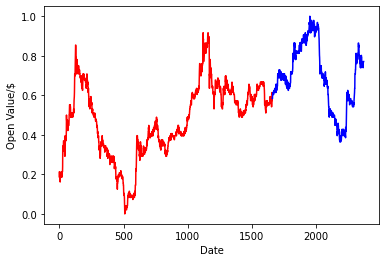

In [17]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1659,2371,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [18]:
print(data.shape[1:])

(50, 4)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model=Sequential()

model.add(Dense(512,activation="relu",input_shape=(data.shape[1:])))
#model.add(Dropout(0.5))
#model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1,activation="linear"))

model.compile(loss='mse',optimizer='adam', metrics=['Accuracy','mse', 'mae', 'mape'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50, 512)           2560      
_________________________________________________________________
dense_6 (Dense)              (None, 50, 256)           131328    
_________________________________________________________________
dense_7 (Dense)              (None, 50, 128)           32896     
_________________________________________________________________
dense_8 (Dense)              (None, 50, 64)            8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3201      
Total params: 178,241
Trainable params: 178,241
Non-trainable params: 0
________________________________________________

In [20]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
47/47 [==============================] - 1s 11ms/step - loss: 0.0382 - accuracy: 0.0000e+00 - mse: 0.0382 - mae: 0.1378 - mape: 73232.2442 - val_loss: 0.0017 - val_accuracy: 0.0000e+00 - val_mse: 0.0017 - val_mae: 0.0291 - val_mape: 5.1039
Epoch 2/200
47/47 [==============================] - 0s 6ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - mse: 0.0025 - mae: 0.0351 - mape: 47897.2736 - val_loss: 8.0770e-04 - val_accuracy: 0.0000e+00 - val_mse: 8.0770e-04 - val_mae: 0.0238 - val_mape: 4.0164
Epoch 3/200
47/47 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - mse: 0.0014 - mae: 0.0265 - mape: 2708.2134 - val_loss: 7.6735e-04 - val_accuracy: 0.0000e+00 - val_mse: 7.6735e-04 - val_mae: 0.0239 - val_mape: 4.0042
Epoch 4/200
47/47 [==============================] - 0s 6ms/step - loss: 9.4167e-04 - accuracy: 0.0000e+00 - mse: 9.4167e-04 - mae: 0.0216 - mape: 16697.9169 - val_loss: 3.7324e-04 - val_accuracy: 0.0000e+00 - val_mse: 3.7324e-04 -

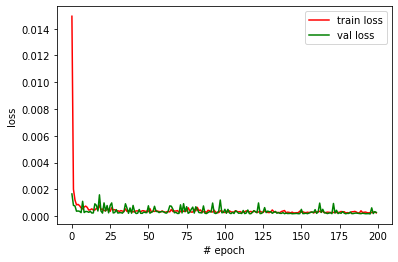

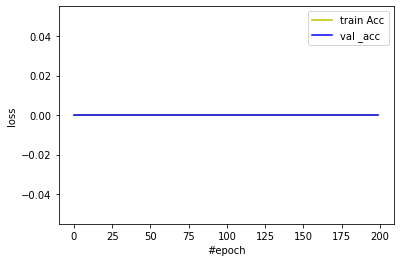

In [21]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],'y',label='train Acc')
plt.plot(history.history['val_accuracy'],'b',label='val _acc')
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

r2 score: 0.9798507880122571


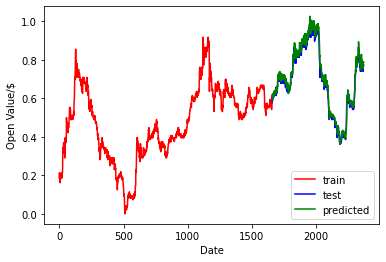

In [23]:
#test_x_range=np.arange(1000,1209,1)
test_x_range=np.arange(1659,2371,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

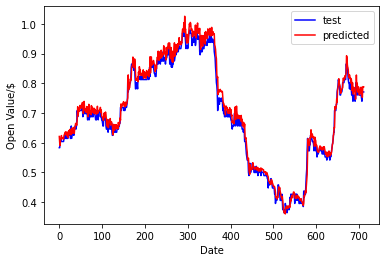

In [24]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()